In [1]:
# Modules

import constants as const
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import sciann as sn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import statistics

---------------------- SCIANN 0.7.0.0 ---------------------- 
For details, check out our review paper and the documentation at: 
 +  "https://www.sciencedirect.com/science/article/pii/S0045782520307374", 
 +  "https://arxiv.org/abs/2005.08803", 
 +  "https://www.sciann.com". 

 Need support or would like to contribute, please join sciann`s slack group: 
 +  "https://join.slack.com/t/sciann/shared_invite/zt-ne1f5jlx-k_dY8RGo3ZreDXwz0f~CeA" 
 
TensorFlow Version: 2.8.1 
Python Version: 3.10.6 (main, Nov 14 2022, 16:10:14) [GCC 11.3.0] 

Outdated SciANN installation is found (V-0.7.0.0). Get the latest version (V-0.7.0.1):  
      > pip [--user] install --upgrade sciann  


In [2]:
# Read reduced dataset

data_turbines = pd.read_csv('../Dataset/Dataset_reduced.csv')
print(data_turbines.shape)

(731709, 6)


In [3]:
# Normalize data

# Define inputs and outputs
X_data = data_turbines[['V','theta','W']]
Y_data = data_turbines[['T','P']]

X_data = X_data.to_numpy(dtype='float64')
Y_data = Y_data.to_numpy(dtype='float64')

# Fit Cp instead of Torque
#Y_data[:,0] = Y_data[:,0]*const.gear*X_data[:,2] / (0.5*const.rho*const.A*X_data[:,0]**3)

# Transform inputs and outputs to normalized units, with its mean and deviation

x1_avrg = np.average(X_data[:,0])
x1_std = np.std(X_data[:,0])
x2_avrg = np.average(X_data[:,1])
x2_std = np.std(X_data[:,1])
x3_avrg = np.average(X_data[:,2])
x3_std = np.std(X_data[:,2])
y1_avrg = np.average(Y_data[:,0])
y1_std = np.std(Y_data[:,0])
y2_avrg = np.average(Y_data[:,1])
y2_std = np.std(Y_data[:,1])

X_data[:,0] = ( X_data[:,0] - x1_avrg ) / x1_std
X_data[:,1] = ( X_data[:,1] - x2_avrg ) / x2_std
X_data[:,2] = ( X_data[:,2] - x3_avrg ) / x3_std
Y_data[:,0] = ( Y_data[:,0] - y1_avrg ) / y1_std
Y_data[:,1] = ( Y_data[:,1] - y2_avrg ) / y2_std

In [4]:
# Set up the NN arquitecture to fit the data

from pickletools import optimize

V = sn.Variable('V')
theta = sn.Variable('theta')
W = sn.Variable('W')

# NN arquitecture
architecture = []
N_layers = 4
N_neurons = 8
for i in range(N_layers):
    architecture.append(N_neurons)

#Torque = sn.Functional('Torque',variables=[V,theta,W],hidden_layers=[30,30],activation='tanh')
Torque = sn.Functional('Torque',variables=[V,theta,W],hidden_layers=architecture,activation='tanh')

# Set up the optimization algorithm
data1 = sn.Data(Torque)
model = sn.SciModel(inputs=[V,theta,W], targets=data1,loss_func='mae',optimizer='adam')

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 V (InputLayer)                 [(None, 1)]          0           []                               
                                                                                                  
 theta (InputLayer)             [(None, 1)]          0           []                               
                                                                                                  
 W (InputLayer)                 [(None, 1)]          0           []                               
                                                                                                  
 concat (Concatenate)           (None, 3)            0           ['V[0][0]',                      
                                                                  'theta[0][0]',              

In [5]:
from tabnanny import verbose

# Split the data in training and test/validation sets
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size=0.2, random_state=38)

train_size = len(X_train[:,0])
test_size = len(X_test[:,0])


Total samples: 585367 
Batch size: 256 
Total batches: 2287 

Epoch 1/1000


2023-02-21 11:07:34.175235: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-21 11:07:34.225670: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory
2023-02-21 11:07:34.225687: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1850] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2023-02-21 11:07:34.226720: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN

2287/2287 [==============================] - 2s 666us/step - batch: 1143.0000 - size: 255.9541 - loss: 0.0531 - lr: 0.0200 - time: 1.7155
Epoch 2/1000
2287/2287 [==============================] - 2s 663us/step - batch: 1143.0000 - size: 255.9541 - loss: 0.0473 - lr: 0.0200 - time: 1.6196
Epoch 3/1000
2287/2287 [==============================] - 2s 670us/step - batch: 1143.0000 - size: 255.9541 - loss: 0.0462 - lr: 0.0200 - time: 1.6355
Epoch 4/1000
2287/2287 [==============================] - 2s 658us/step - batch: 1143.0000 - size: 255.9541 - loss: 0.0457 - lr: 0.0200 - time: 1.6184
Epoch 5/1000
2287/2287 [==============================] - 2s 663us/step - batch: 1143.0000 - size: 255.9541 - loss: 0.0449 - lr: 0.0200 - time: 1.6322
Epoch 6/1000
2287/2287 [==============================] - 2s 660us/step - batch: 1143.0000 - size: 255.9541 - loss: 0.0447 - lr: 0.0200 - time: 1.6263
Epoch 7/1000
2287/2287 [==============================] - 2s 658us/step - batch: 1143.0000 - size: 255.9541

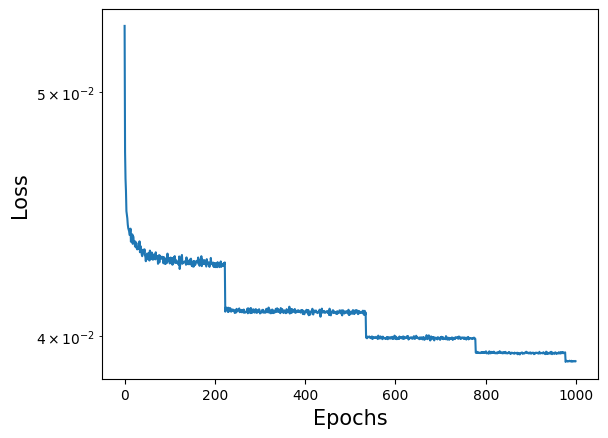

In [6]:
# Train the model

#_learning_rate = 0.02
_learning_rate = 0.02
#_epochs = 10
_epochs = 1000
_batch_size = 256
running = model.train([X_train[:,0],X_train[:,1],X_train[:,2]],Y_train[:,0],batch_size=_batch_size,learning_rate=_learning_rate, epochs=_epochs,verbose=1)
plt.xlabel('Epochs',fontsize=15)
plt.ylabel('Loss',fontsize=15)
plt.semilogy(running.history['loss'])
plt.show()


In [7]:
# save model weights 
architecture_string = str(N_layers)+'layers-'+str(N_neurons)+'neurons'
model.save_weights('weights-'+architecture_string+'.hdf5')
#model.save_weights('weights.hdf5')

# load model weights
#model.load_weights('weights.hdf5')

# Save the entire model to a HDF5 file.
# The '.h5' extension indicates that the model should be saved to HDF5.
#model.save('my_model.h5')

# Recreate the exact same model, including its weights and the optimizer
#new_model = tf.keras.models.load_model('my_model.h5')

# Show the model architecture
#new_model.summary()

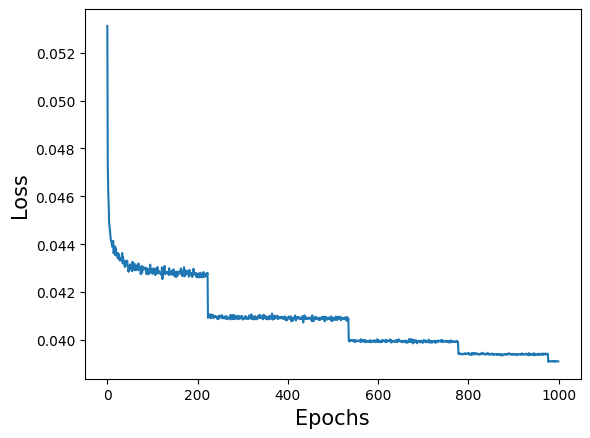

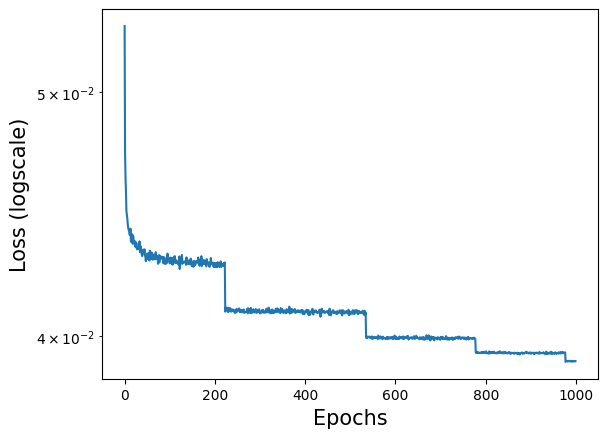

" plt.xlabel('Epochs',fontsize=15)\nplt.ylabel('Loss (logscale)',fontsize=15)\nplt.semilogy(running.history['val_loss'])\nplt.show() "

In [8]:
# Plot loss

plt.xlabel('Epochs',fontsize=15)
plt.ylabel('Loss',fontsize=15)
plt.plot(running.history['loss'])
plt.show()
plt.xlabel('Epochs',fontsize=15)
plt.ylabel('Loss (logscale)',fontsize=15)
plt.semilogy(running.history['loss'])
plt.show()

""" plt.xlabel('Epochs',fontsize=15)
plt.ylabel('Loss (logscale)',fontsize=15)
plt.semilogy(running.history['val_loss'])
plt.show() """

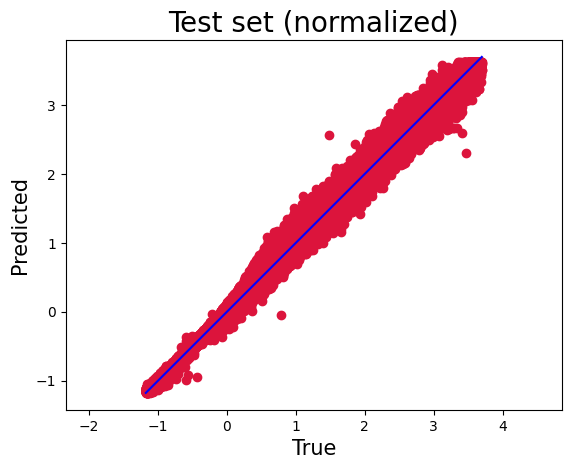

Normalized test MAE: 0.039311151474792506
Normalized test MSE: 0.004522586149243572
Normalized test MAPE: 49.05445757258781


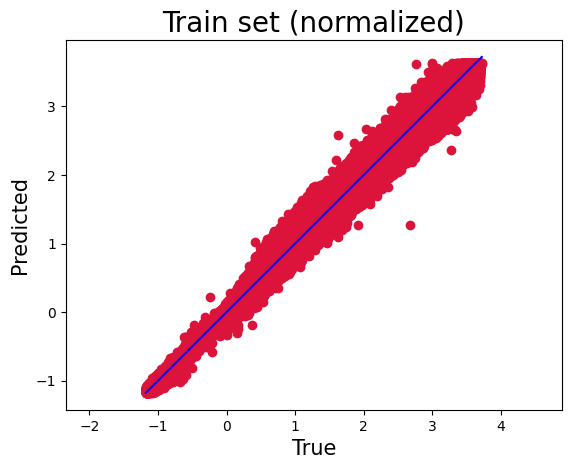

Normalized train MAE: 0.039364775593925504
Normalized train MSE: 0.0045362064309479155
Normalized train MAPE: 37.348408012269935


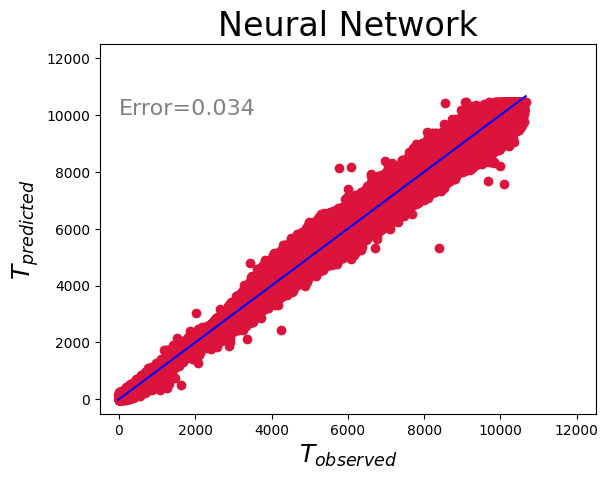

Test MAE: 85.8365574457287
Test MSE: 21567.390575795704
Test MAPE: 4.1798562078315955


In [12]:
# Evaluate the model

# mean absolute percentage error (MAPE)
from tkinter import Y

# mean absolute percentage error (MAPE)
def mape(ytrue, ypred):
    ytrue, ypred = np.array(ytrue), np.array(ypred)
    
    # Remove low values to compute MAPE
    q_low = np.quantile(ytrue,0.01)
    ypred = ypred[ ytrue > q_low ]
    ytrue = ytrue[ ytrue > q_low ]
    
    #mape_i = np.zeros(len(ytrue))
    #mape_i = np.abs((ypred-ytrue)/ytrue)*100
    #mape_i = mape_i[ mape_i < 1e3]

    #return np.mean(mape_i)
    return np.mean(np.abs((ytrue - ypred) / ytrue)) * 100

""" def mape(ytrue, ypred):
    ytrue, ypred = np.array(ytrue), np.array(ypred)
    return np.mean(np.abs((ytrue - ypred) / ytrue)) * 100 """

# Loss function on test set

y_exact = np.zeros(test_size)
y_pred = np.zeros(test_size)
y_exact[:] = Y_test[:,0]
y_pred[:] = Torque.eval([X_test[:,0],X_test[:,1],X_test[:,2]])

""" y_exact = np.zeros(len(Y_data[:,0]))
y_pred = np.zeros(len(Y_data[:,0]))
y_exact[:] = Y_data[:,0]
y_pred[:] = Torque.eval([X_data[:,0],X_data[:,1],X_data[:,2]]) """

plt.figure()#figsize=(10,10))
plt.scatter(y_exact,y_pred,c='crimson')
#plt.yscale('log')
#plt.xscale('log')

p1 = max(max(y_pred), max(y_exact))
p2 = min(min(y_pred), min(y_exact))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True',fontsize=15)
plt.ylabel('Predicted',fontsize=15)
plt.axis('equal')
plt.title('Test set (normalized)',fontsize=20)
plt.show()

print("Normalized test MAE:", mean_absolute_error(y_exact,y_pred))
print("Normalized test MSE:", mean_squared_error(y_exact,y_pred))
print("Normalized test MAPE:", mape(y_exact,y_pred))

# Loss function on training set

y_exact = np.zeros(train_size)
y_pred = np.zeros(train_size)
y_exact[:] = Y_train[:,0]
y_pred[:] = Torque.eval([X_train[:,0],X_train[:,1],X_train[:,2]])

plt.figure()#figsize=(10,10))
plt.scatter(y_exact,y_pred,c='crimson')
#plt.yscale('log')
#plt.xscale('log')

p1 = max(max(y_pred), max(y_exact))
p2 = min(min(y_pred), min(y_exact))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True',fontsize=15)
plt.ylabel('Predicted',fontsize=15)
plt.axis('equal')
plt.title('Train set (normalized)',fontsize=20)
plt.show()

print("Normalized train MAE:", mean_absolute_error(y_exact,y_pred))
print("Normalized train MSE:", mean_squared_error(y_exact,y_pred))
print("Normalized train MAPE:", mape(y_exact,y_pred))

# Evaluation on the original dataset (without normalization)


#y_exact = np.zeros(test_size)
#y_pred = np.zeros(test_size)
#y_exact[:] = Y_test[:,0] * y1_std + y1_avrg
#y_pred[:] = Torque.eval([X_test[:,0],X_test[:,1],X_test[:,2]]) * y1_std + y1_avrg

y_exact = np.zeros(len(Y_data[:,0]))
y_pred = np.zeros(len(Y_data[:,0]))
y_exact[:] = Y_data[:,0] * y1_std + y1_avrg
y_pred[:] = Torque.eval([X_data[:,0],X_data[:,1],X_data[:,2]]) * y1_std + y1_avrg

plt.figure()#figsize=(10,10))
plt.scatter(y_exact,y_pred,c='crimson')
#plt.yscale('log')
#plt.xscale('log')

error_fit = mean_absolute_error(y_exact,y_pred) / np.mean(y_exact)
p1 = max(max(y_pred), max(y_exact))
p2 = min(min(y_pred), min(y_exact))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('$T_{observed}$',fontsize=18)
plt.ylabel('$T_{predicted}$',fontsize=18)
plt.title('Neural Network',fontsize=24)
plt.text(0,10000,'Error='+str(round(error_fit,3)),fontsize=16, color='grey')
plt.xlim([-500,12500])
plt.ylim([-500,12500])
#plt.axis('equal')
plt.show()

""" p1 = max(max(y_pred), max(y_exact))
p2 = min(min(y_pred), min(y_exact))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True',fontsize=15)
plt.ylabel('Predicted',fontsize=15)
plt.axis('equal')
plt.title('Neural Network fit, MAPE='+str(round(mape(y_exact,y_pred),1))+'%',fontsize=18)
plt.show() """

print("Test MAE:", mean_absolute_error(y_exact,y_pred))
print("Test MSE:", mean_squared_error(y_exact,y_pred))
print("Test MAPE:", mape(y_exact,y_pred))

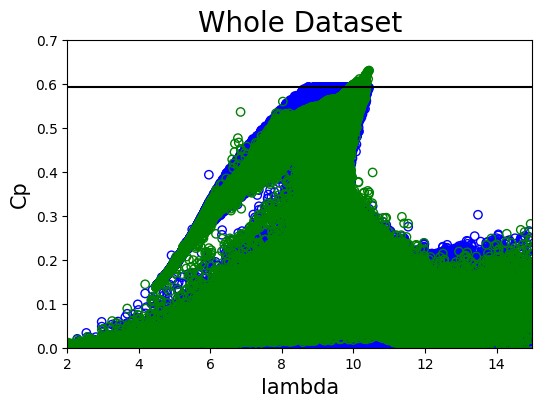

Predicciones no físicas: 1589 (0.21716283385881546 %)


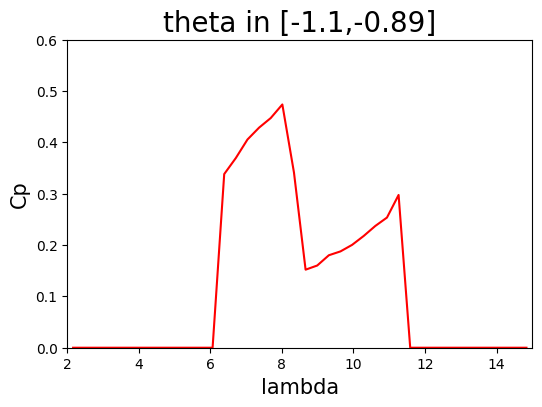

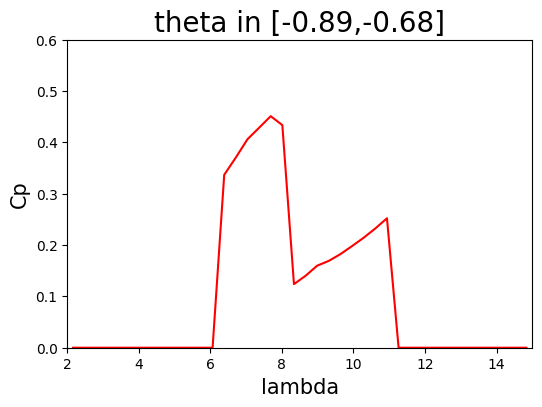

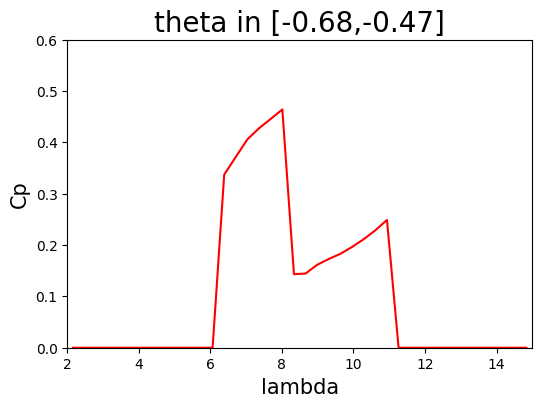

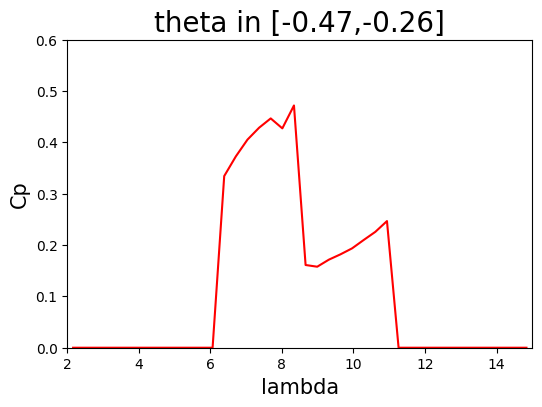

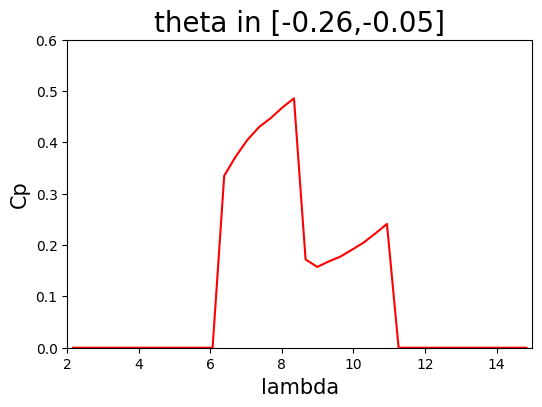

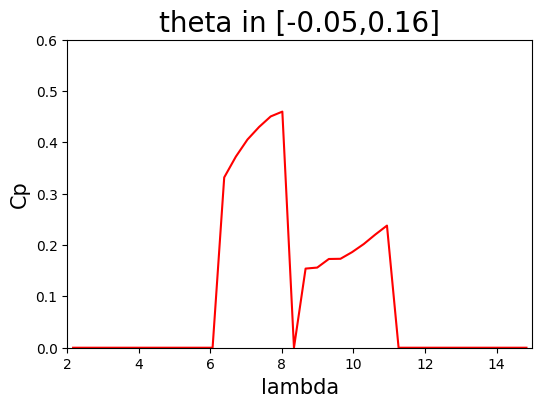

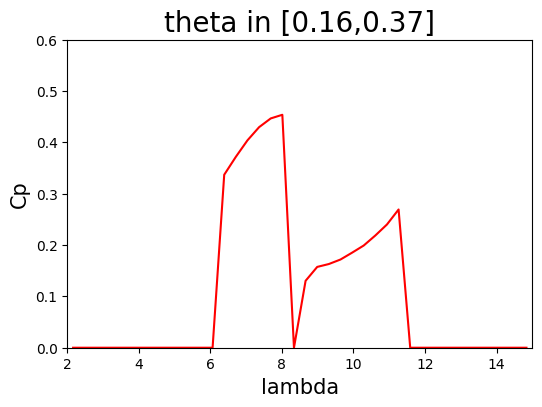

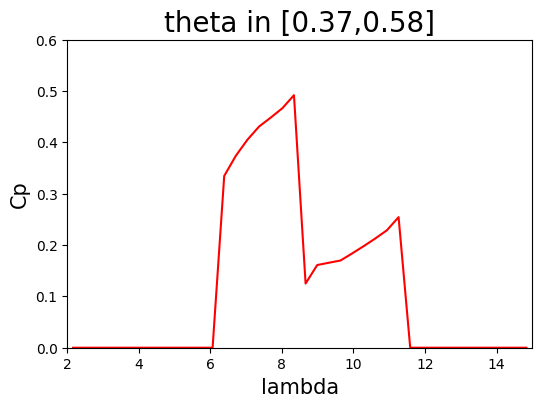

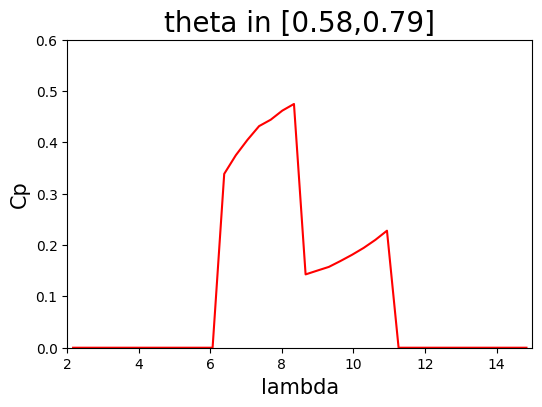

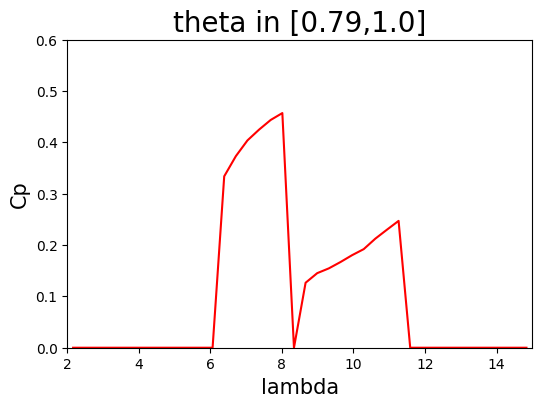

In [13]:
# Cp vs lambda

def Cp_fromP(Pturbina, Vw):

    Cp = Pturbina / (0.5 * const.rho * const.A * Vw**3)

    return Cp

def Cp_fromT(Tgen, Vw, Wwt):

    Tt = Tgen * const.gear
    Pturbina = Tt* Wwt
    Cp = Pturbina / (0.5 * const.rho * const.A * Vw**3)

    return Cp    

def lambd(Vw, Wwt):

    lambd = Wwt * const.R / Vw

    return lambd

def Power( Tgen, Vw, Wwt ):

    Cp = Cp_fromT(Tgen,Vw, Wwt)
    Pturbina = 0.5 * Cp * const.rho * const.A * Vw**3

    return Pturbina

# Prediction of torque
T_predicted = np.zeros(len(X_data[:,0]))
T_predicted[:] = Torque.eval([X_data[:,0],X_data[:,1],X_data[:,2]]) * y1_std + y1_avrg 

# Convert to non-normalized units
X_data_def = np.zeros((len(X_data[:,0]),5))
Y_data_def = np.zeros((len(X_data[:,0]),5))

X_data_def[:,0] = X_data[:,0] * x1_std + x1_avrg
X_data_def[:,1] = X_data[:,1] * x2_std + x2_avrg
X_data_def[:,2] = X_data[:,2] * x3_std + x3_avrg
Y_data_def[:,0] = Y_data[:,0] * y1_std + y1_avrg
Y_data_def[:,1] = Y_data[:,1] * y2_std + y2_avrg

# Cp and lambda
Cp_data = np.zeros(len(X_data_def[:,0]))
Cp_predicted = np.zeros(len(X_data_def[:,0]))
lambd_data = np.zeros(len(X_data_def[:,0]))

Cp_data[:] = Cp_fromT(Y_data_def[:,0], X_data_def[:,0], X_data_def[:,2])
lambd_data = lambd(X_data_def[:,0], X_data_def[:,2])
Cp_predicted[:] = Cp_fromT(T_predicted[:], X_data_def[:,0], X_data_def[:,2])

# Plot Cp vs lambda of all data
Cp_max = 0.5926
plt.figure(figsize=(6,4))
plt.xlabel('lambda',fontsize=15)
plt.ylabel('Cp',fontsize=15)
plt.title('Whole Dataset',fontsize=20)
plt.scatter(lambd_data, Cp_data,facecolors='none',edgecolors='blue')
plt.scatter(lambd_data,Cp_predicted, facecolors='none',edgecolors='green')
#plt.plot(lambd_data, Cp_predicted, 'go')
#plt.plot(lambd_predicted,Cp_data,'bo')
plt.axhline(y=Cp_max, color = 'k', linestyle = '-')
plt.xlim([2,15])
plt.ylim([0,0.7])
plt.show()

# Count data with Cp>0.593
def getCount(listOfElems, cond = None):
    'Returns the count of elements in list that satisfies the given condition'
    if cond:
        count = sum(cond(elem) for elem in listOfElems)
    else:
        count = len(listOfElems)    
    return count
N_count = getCount( Cp_predicted, lambda x: x>Cp_max) 
print("Predicciones no físicas: "+str(N_count)+" ("+str(N_count/len(Cp_predicted)*100)+" %)")

# Construct Cp vs lambda for different theta
lmin = 2
lmax = 15
nbins = 40
Cp_estimated = np.zeros(nbins)
lambd_estimated = np.zeros(nbins)
dl = (lmax-lmin)/nbins

# theta binning
theta_min = -1.1 *np.pi/180.0        # (degree to rad)
theta_max = 1.0  *np.pi/180.0
nangles = 10
da = (theta_max - theta_min) / nangles

theta_data = np.zeros(len(X_data[:,1]))
theta_data[:] = X_data[:,1]

for i in range(nangles):
    angle_l = theta_min + i*da
    angle_h = angle_l + da
    angle = (angle_l + angle_h)/2

    cond_angle = (angle_l<theta_data) & (theta_data<angle_h)
    theta_prov = theta_data[ cond_angle ]
    lambd_prov = lambd_data[ cond_angle ]
    Cp_prov = Cp_predicted[ cond_angle ]

    Cp_estimated[0]=0.0
    for j in range(nbins):
        lambdal = lmin + j*dl
        lambdar = lambdal + dl

        # Median of Cp in the bin j
        lambd_estimated[j] = (lambdal+lambdar)/2.0
        l_subset = (lambdal<lambd_prov) & (lambd_prov<lambdar)  # subset of lambda points of the bin
        Cpj = Cp_prov[l_subset]     # Cp distribution of bin j
        if (len(Cpj)>0):
            #Cp_estimated[i]=statistics.median(Cpj)
            Cp_estimated[j]=statistics.mean(Cpj)
            #Cp_estimated[j]=np.max(Cpj)
            #Cp_estimated[j]=np.percentile(Cpj,95)
        else:
            #Cp_estimated[j]=Cp_estimated[j-1]
            Cp_estimated[j]=0.0

    plt.figure(figsize=(6,4))
    plt.xlabel('lambda',fontsize=15)
    plt.ylabel('Cp',fontsize=15)
    plt.plot(lambd_estimated, Cp_estimated, 'r-')
    #plt.title('theta='+str( round(angle*180/np.pi,2) ),fontsize=20)
    plt.title('theta in ['+str( round(angle_l*180/np.pi,2) )+','+str( round(angle_h*180/np.pi,2) )+']',fontsize=20)
    plt.xlim([2,15])
    plt.ylim([0,0.6])
    plt.show()
